# 課題1

In [22]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def getKeyResponse(GazeDataFrame):
    tmp = GazeDataFrame[GazeDataFrame['Event'].isin(['KeyboardEvent'])]
    Response = tmp[1:16][tmp['Event value'] != 'space']['Event value'].values
    return Response

tmp = pd.read_table("./Class_EyeTracking/CorrectAnswer.csv")
Correct = tmp['Correct Answer'].values

ID_list = [f'ID{i:03d}' for i in range(20)] + [f'ID{i:03d}' for i in range(101, 106)]

result_dfs = []  # 各IDごとの結果を格納するためのリスト

# 000から019と101から105までのIDに対してループ
for i in ID_list:
    # csvファイルをロード
    df = pd.read_csv(f"./Class_EyeTracking/data/{i}_DataExport.csv")
    
    # getKeyResponse関数で 'Response' 列を生成
    Response = getKeyResponse(df)

    # Hit, False Alarm, Miss, Correct Rejectionの計算
    TP = sum((Response == 'Right') & (Correct == 'Right'))
    FP = sum((Response == 'Right') & (Correct == 'Left'))
    FN = sum((Response == 'Left') & (Correct == 'Right'))
    TN = sum((Response == 'Left') & (Correct == 'Left'))

    # 評価指標の計算
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F = (2 * Precision * Recall) / (Precision + Recall)
    KeyMiss = 15 - TP - FP - FN - TN

    # 結果のDataFrameを作成
    result_df = pd.DataFrame({
        'ID': [i],
        'Accuracy': [Accuracy],
        'Precision': [Precision],
        'Recall': [Recall],
        "F-measure": [F],
        'TP': [TP],
        'FN': [FN],
        'FP': [FP],
        'TN': [TN],
        'KeyMiss': [KeyMiss]
    })

    # 結果をリストに追加
    result_dfs.append(result_df)

# 全ての結果を1つのDataFrameに結合
final_result_df = pd.concat(result_dfs, ignore_index=True)
final_result_df.to_csv("kadai1.csv", index=False)
# 結果のDataFrameを表示
final_result_df

,ID,Accuracy,Precision,Recall,F-measure,TP,FN,FP,TN,KeyMiss
0,ID000,1.000000,1.000000,1.000000,1.000000,10,0,0,4,1
1,ID001,0.866667,0.833333,1.000000,0.909091,10,0,2,3,0
2,ID002,0.600000,0.833333,0.500000,0.625000,5,5,1,4,0
3,ID003,0.666667,0.857143,0.600000,0.705882,6,4,1,4,0
4,ID004,0.866667,0.900000,0.900000,0.900000,9,1,1,4,0
5,ID005,0.933333,1.000000,0.900000,0.947368,9,1,0,5,0
6,ID006,0.600000,0.833333,0.500000,0.625000,5,5,1,4,0
7,ID007,1.000000,1.000000,1.000000,1.000000,10,0,0,5,0
8,ID008,0.800000,1.000000,0.700000,0.823529,7,3,0,5,0
9,ID009,0.800000,1.000000,0.700000,0.823529,7,3,0,5,0


# 課題2 TOI

In [53]:
import pandas as pd

ID_list = [f'ID{i:03d}' for i in range(20)] + [f'ID{i:03d}' for i in range(101, 106)]
stimuli_list = ['01_Kyoumu_T.png', '02_Amazon2_F.png', '03_Amazon3_F.png', '04_Rakuten2_F.png',
                '05_ticket_T.png', '06_Rakuten_F.png', '07_Rakuten_T.png', '08_yodobasi_F.png',
                '09_Apple1_F.png', '10_Kankou_T.png', '11_LINE_F.png', '12_Kyufu2_F.png',
                '13_ponta_T.png', '14_Kyufu_F.png', '15_SMBC_F.png']

# Create an empty dictionary to store results
result_data = {'ID': ID_list}

def getTOI(GazeDataFrame, MediaName):
    TOI = GazeDataFrame[GazeDataFrame['Presented Media name'].isin([MediaName])]
    return TOI

for MediaName in stimuli_list:
    durations = []
    for ID in ID_list:
        df = pd.read_csv(f"./Class_EyeTracking/data/{ID}_DataExport.csv")  # Experiment data path
        TOI = getTOI(df, MediaName)

        if not TOI.empty:
            TOI_start = TOI['Recording timestamp'].iloc[1]
            TOI_end = TOI['Recording timestamp'].iloc[-1]
            Duration = (TOI_end - TOI_start) / 1000000
            durations.append(Duration)
        else:
            durations.append(None)

    result_data[MediaName] = durations

# Convert the dictionary to a DataFrame
result_df = pd.DataFrame(result_data)

# 最大の秒数を持つIDと画像名を検索
max_duration_row = result_df.loc[result_df[result_df.columns[2:]].max(axis=1).idxmax()]

# 最小の秒数を持つIDと画像名を検索
min_duration_row = result_df.loc[result_df[result_df.columns[2:]].min(axis=1).idxmin()]

# 画像名を取得する際に None を除外
max_image_name = result_df.columns[2:][max_duration_row[result_df.columns[2:]].astype(float).values.argmax()] if not max_duration_row[result_df.columns[2:]].isna().all() else None
min_image_name = result_df.columns[2:][min_duration_row[result_df.columns[2:]].astype(float).values.argmin()] if not min_duration_row[result_df.columns[2:]].isna().all() else None

# 結果を出力
print("最大の秒数:")
print("ID:", max_duration_row['ID'])
print("画像名:", max_image_name)
print("秒数:", max_duration_row[result_df.columns[2:][max_duration_row[result_df.columns[2:]].astype(float).values.argmax()]])
print("\n最小の秒数:")
print("ID:", min_duration_row['ID'])
print("画像名:", min_image_name)
print("秒数:", min_duration_row[result_df.columns[2:][min_duration_row[result_df.columns[2:]].astype(float).values.argmin()]])

result_df


最大の秒数:
ID: ID015
画像名: 15_SMBC_F.png
秒数: 116.550561

最小の秒数:
ID: ID010
画像名: 08_yodobasi_F.png
秒数: 1.066667


,ID,01_Kyoumu_T.png,02_Amazon2_F.png,03_Amazon3_F.png,04_Rakuten2_F.png,05_ticket_T.png,06_Rakuten_F.png,07_Rakuten_T.png,08_yodobasi_F.png,09_Apple1_F.png,10_Kankou_T.png,11_LINE_F.png,12_Kyufu2_F.png,13_ponta_T.png,14_Kyufu_F.png,15_SMBC_F.png
0,ID000,6.633282,10.216574,5.583660,6.999929,5.533282,10.033595,9.116590,7.833262,7.433271,9.866582,6.616978,12.383224,10.050316,7.233343,9.383233
1,ID001,14.883203,7.849935,8.183259,7.483626,9.916563,10.300269,17.799830,16.366509,10.733593,11.399902,13.116915,13.383212,18.583225,13.500235,7.649920
2,ID002,9.799865,9.816524,2.699963,15.767044,6.933258,7.116640,13.883412,11.966543,13.916866,9.583249,10.283250,9.399913,11.849882,11.483384,11.433229
3,ID003,15.217012,30.716489,3.416631,19.949939,11.283942,2.716644,36.216285,9.900303,3.683504,14.766515,13.549879,7.516900,18.083485,16.116535,10.600275
4,ID004,40.016854,32.400183,22.400090,28.066825,56.366987,38.716875,41.033541,21.283443,24.150170,35.516866,12.150093,36.158540,35.458526,23.866802,31.933512
5,ID005,27.416806,24.300139,7.966655,13.850090,11.533411,23.083456,5.650042,7.533388,8.783370,15.166714,25.016791,35.916883,13.000047,24.383436,27.566795
6,ID006,23.466827,26.816824,11.633393,18.000101,25.750121,15.816777,19.816749,11.850069,5.400038,25.483450,4.566700,8.666740,9.350069,16.066770,11.050033
7,ID007,22.033461,4.300034,11.350059,21.083504,31.283526,31.883527,27.750163,6.316714,4.733369,36.750164,8.983410,21.200130,25.766856,12.433430,17.033474
8,ID008,23.650122,13.783415,15.183406,22.016829,19.466789,24.816808,24.483486,18.816803,14.266711,17.683428,9.850070,20.116804,22.083462,10.866705,21.816829
9,ID009,6.300018,4.066684,7.250046,11.866707,9.250039,11.900043,27.483446,14.166705,14.416714,19.716726,6.550021,27.916777,18.316733,16.233385,9.433382


## パフォーマンス最低

ID: ID015
MediaName: 15_SMBC_F.png


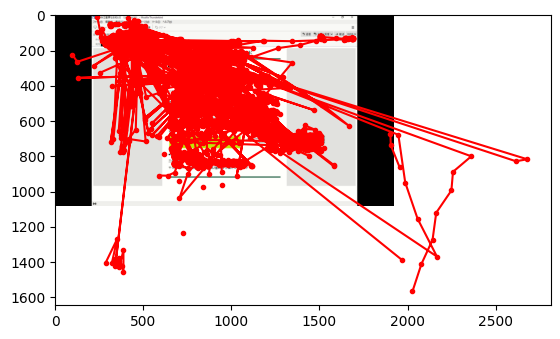

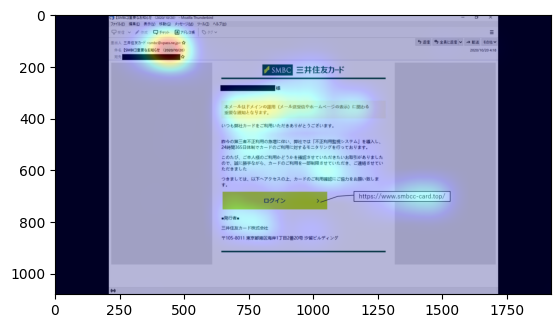

In [57]:
#-------------------------------------------------------------------------------
# 課題2-1：視線位置のプロット
#-------------------------------------------------------------------------------

# ライブラリインポート
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

#----- 被験者応答読み込み
ID = max_duration_row['ID']  # 被験者名; ここを変えれば他の被験者データの処理もできる。
print("ID:", ID)
# csvファイルをロード
df = pd.read_csv("./Class_EyeTracking/data/" + ID + "_DataExport.csv") #実験データへのパス

# TOI抽出
MediaName = max_image_name
print("MediaName:", MediaName)
TOI = getTOI(df, MediaName)

# 視線位置の X, Y を取得。この値を使ってプロットする。
GazeX = TOI['Gaze point X']
GazeY = TOI['Gaze point Y']

# 刺激画像の読み込み;
img_bgr = cv2.imread('./Class_EyeTracking/stimuli/' + MediaName[:-4] + '_Stim.png')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# 画像の表示
plt.imshow(img)
plt.plot(GazeX, GazeY, 'r.-')
plt.show()



# 1. ----- 画像配列初期化
imSize = img.shape
heatmap = np.zeros([imSize[0], imSize[1]], dtype='float32')

# イメージのサイズを取得
image_height, image_width = imSize[:2]

# 2.～4. ----- 視線位置が記録された画素をインクリメント
for i in range(len(GazeX)):
    # 視線位置が記録されていれば処理（Eyes Not Found の場合もあるので。）
    if not (np.isnan(GazeX.iloc[i]) or np.isnan(GazeY.iloc[i])):
        # インデックスが画像サイズを超えないように制約
        xx = min(int(GazeX.iloc[i]), image_width - 1)
        yy = min(int(GazeY.iloc[i]), image_height - 1)
        heatmap[yy, xx] = heatmap[yy, xx] + 1

# 5. ----- ぼかしを適用
# 標準偏差=50pixのガウス分布を使用
# ガウス分布が0に漸近するのに十分なカーネルサイズを指定; 標準偏差の4倍あればOK
heatmap_blur = cv2.GaussianBlur(heatmap, (201,201), 50)
# 画像を 0-1 に正規化
MAX = np.max(heatmap_blur)  # 最大値
MIN = np.min(heatmap_blur)  # 最小値
heatmap_blur = (heatmap_blur - MIN)/(MAX - MIN) # 正規化

#----- 表示するための作業
# ヒートマップをRGBに変換
heatmap_rgb = np.uint8(255 * heatmap_blur)
# JETのカラーマップを適用
heatmap_rgb = cv2.applyColorMap(heatmap_rgb, cv2.COLORMAP_JET)
# RGBに変換
heatmap_rgb = cv2.cvtColor(heatmap_rgb, cv2.COLOR_BGR2RGB)

superimposed_img = heatmap_rgb*0.4 + img
superimposed_img = superimposed_img/np.max(superimposed_img)

# 画像を表示
fig = plt.figure()
plt.imshow(superimposed_img)

# 保存
filename = 'heatmap_' + MediaName
plt.savefig(filename)



## パフォーマンス最高

ID: ID010
MediaName: 08_yodobasi_F.png


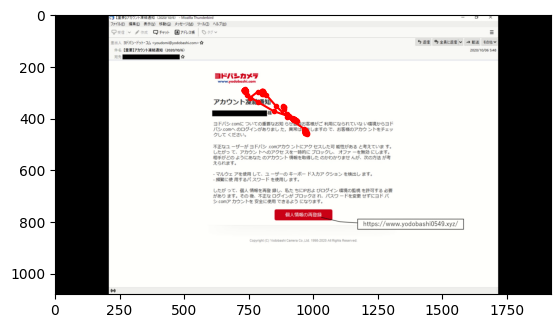

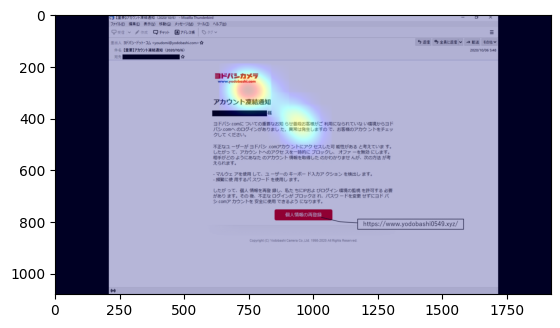

In [58]:
#-------------------------------------------------------------------------------
# 課題2-1：視線位置のプロット
#-------------------------------------------------------------------------------

# ライブラリインポート
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

#----- 被験者応答読み込み
ID = min_duration_row['ID']
print("ID:", ID)
# csvファイルをロード
df = pd.read_csv("./Class_EyeTracking/data/" + ID + "_DataExport.csv") #実験データへのパス

# TOI抽出
MediaName = min_image_name
print("MediaName:", MediaName)
TOI = getTOI(df, MediaName)

# 視線位置の X, Y を取得。この値を使ってプロットする。
GazeX = TOI['Gaze point X']
GazeY = TOI['Gaze point Y']

# 刺激画像の読み込み;
img_bgr = cv2.imread('./Class_EyeTracking/stimuli/' + MediaName[:-4] + '_Stim.png')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# 画像の表示
plt.imshow(img)
plt.plot(GazeX, GazeY, 'r.-')
plt.show()



# 1. ----- 画像配列初期化
imSize = img.shape
heatmap = np.zeros([imSize[0], imSize[1]], dtype = 'float32')
gazeNum = 0

# 2.～4. ----- 視線位置が記録された画素をインクリメント
for i in range(len(GazeX)):
  # 視線位置が記録されていれば処理（Eyes Not Found の場合もあるので。）
  if not( np.isnan(GazeX.iloc[i]) ) :
    xx = int(GazeX.iloc[i])
    yy = int(GazeY.iloc[i])
    heatmap[yy, xx] = heatmap[yy, xx] + 1

# 5. ----- ぼかしを適用
# 標準偏差=50pixのガウス分布を使用
# ガウス分布が0に漸近するのに十分なカーネルサイズを指定; 標準偏差の4倍あればOK
heatmap_blur = cv2.GaussianBlur(heatmap, (201,201), 50)
# 画像を 0-1 に正規化
MAX = np.max(heatmap_blur)  # 最大値
MIN = np.min(heatmap_blur)  # 最小値
heatmap_blur = (heatmap_blur - MIN)/(MAX - MIN) # 正規化

#----- 表示するための作業
# ヒートマップをRGBに変換
heatmap_rgb = np.uint8(255 * heatmap_blur)
# JETのカラーマップを適用
heatmap_rgb = cv2.applyColorMap(heatmap_rgb, cv2.COLORMAP_JET)
# RGBに変換
heatmap_rgb = cv2.cvtColor(heatmap_rgb, cv2.COLOR_BGR2RGB)

superimposed_img = heatmap_rgb*0.4 + img
superimposed_img = superimposed_img/np.max(superimposed_img)

# 画像を表示
fig = plt.figure()
plt.imshow(superimposed_img)

# 保存
filename = 'heatmap_' + MediaName
plt.savefig(filename)


# 課題3 AOI

In [51]:
ID = 'ID000'
raw = pd.read_table('./Class_EyeTracking/Metrics/' + ID + '_Metrics.tsv')

cutLabels = []  # 抽出するデータラベルを保存するリスト
for label in raw.columns:
  # if文で特定の文字列を含む列を抽出
  if label.find('Total_duration_of_fixations') != -1 or label.find('Duration_of_interval') != -1 or label.find('TOI') != -1:
    cutLabels.append(label) # リストに追加

# データを抽出
df = raw[cutLabels]
df.head()

,TOI,Duration_of_interval,Total_duration_of_fixations.01_Footer,Total_duration_of_fixations.01_Header,Total_duration_of_fixations.01_HeaderTime,Total_duration_of_fixations.01_URL1,Total_duration_of_fixations.02_Header,Total_duration_of_fixations.02_HeaderTime,Total_duration_of_fixations.02_URL1,Total_duration_of_fixations.02_URL2,...,Total_duration_of_fixations.13_HeaderTime,Total_duration_of_fixations.13_URL1,Total_duration_of_fixations.13_URL2,Total_duration_of_fixations.14_Header,Total_duration_of_fixations.14_HeaderTime,Total_duration_of_fixations.14_URL1,Total_duration_of_fixations.15_footer,Total_duration_of_fixations.15_Header,Total_duration_of_fixations.15_HeaderTime,Total_duration_of_fixations.15_URL1
0,01_Kyoumu_T,6650,1083.0,1083.0,167.0,992.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02_Amazon2_F,10233,NaN,NaN,NaN,NaN,2008.0,662.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03_Amazon3_F,5600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04_Rakuten2_F,7017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05_ticket_T,5550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
#-------------------------------------------------------------------------------
# 課題3：被験者1名のAOI時間を、画像刺激間で平均する。
#-------------------------------------------------------------------------------

NUM = 15  # 呈示刺激の数; 今回は 15なので 15+1=16
TOI = raw['TOI'].iloc[0:NUM]  # TOIを初期化; rawデータから引っ張ってくる
res = np.zeros([NUM, 4])

# TOIでloop 処理
for i in range(NUM):  
  print(df['TOI'].iloc[i])  # 解析するTOIを表示; debug用
  # 計算用変数の初期化
  Header = 0
  HeaderTime = 0
  Footer = 0
  URL = 0

  tmp = df[i:i+1].dropna(how="all", axis=1) #欠損値（NaN）を含むデータラベルを除外
  TOTAL = np.array(tmp['Duration_of_interval'].values)

  # データラベルで loop 処理
  for label in tmp.columns:
    # データラベルが Header で終わる列を抽出
    if label.endswith('Header') == 1:
      #print(label)
      Header = Header + tmp[label].values
    # データラベルが HeaderTime で終わる列を抽出
    if label.endswith('HeaderTime') == 1:
      #print(label)
      HeaderTime = HeaderTime + tmp[label].values
    # データラベルが Footer で終わる列を抽出
    if label.endswith('Footer'):
      #print(label)
      Footer = Footer + tmp[label].values
    # データラベルに URL を含む列を抽出
    if label.find('URL') != -1:
      #print(label)
      URL = URL + tmp[label].values

  '''  
  #結果表示; debug用
  print(Header)
  print(HeaderTime)
  print(Footer)
  print(URL)
  '''
  # 結果を格納
  calc = np.array([Header, HeaderTime, Footer, URL]) / TOTAL  #TOTALで割って正規化
  res[i,:] = calc.reshape(1,4)

# DataFrame として統合
df_sum = pd.DataFrame(res, 
                      columns = ['Header', 'HeaderTime', 'Footer', 'URL'],
                      index = TOI)
df_sum

01_Kyoumu_T
02_Amazon2_F


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.